# Image Data Download and Preprocess

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
# Want the vid_id,thumbnail and views from our data
data = pickle.load(open(r"Data\players_cleaned_df.pickle","rb"))

# Running a test before the actual download process

In [3]:
url = data['thumbnail'][0]
response = requests. get(url)

In [4]:
file = open("testimage.png", "wb")
file.write(response.content)
file.close()

In [5]:
image = load_img("testimage.png")
input_arr = img_to_array(image)

In [6]:
type(input_arr)

numpy.ndarray

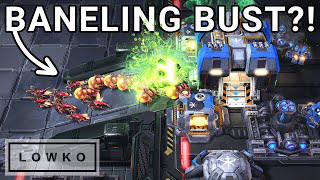

In [7]:
image

In [8]:
input_arr.shape

(180, 320, 3)

# Actual Download

In [9]:
# Pulling out the video_ids to name the file, and corresponding URLs
video_ids = data['vid_id']
urls = data['thumbnail']

In [10]:
video_ids

0       LHDQ8iSbdck
1       IM7OdVKFW4M
2       ReDXHIf6cuc
3       kWfuYGNq1C4
4       IUqQ_rVnSXg
           ...     
1247    2KJv_9IbrZ0
1248    aOqlr2tN4Eo
1249    Age4eNRUMrk
1250    czuUoHltWpc
1251    Co4LMljCe4s
Name: vid_id, Length: 1252, dtype: object

In [12]:
# *** Image Downloader - DO NOT RERUN ***
for i,vid in enumerate(video_ids):
    url = urls[i]
    response = requests.get(url)
    file_name = r"Images/"+vid+".png"
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()

In [13]:
# Generates the image data values from each image
images_data = []
for vid in video_ids:
    image_name = r"Images/"+vid+".png"
    current_image = load_img(image_name)
    current_image_data = img_to_array(current_image)
    images_data.append(current_image_data)

In [14]:
len(images_data)

1252

# Organizing data into a DataFrame

In [15]:
data['image_data'] = images_data

In [16]:
data['image_data'].head(1).values[0].shape

(180, 320, 3)

In [17]:
image_df = data[['vid_id','views','image_data']]

In [18]:
image_df.head(1)

,vid_id,views,image_data
0,LHDQ8iSbdck,8088,"[[[32.0, 36.0, 45.0], [26.0, 30.0, 39.0], [27...."


# Export Image Data

In [19]:
with open(r'Data\image_df.pickle', 'wb') as f:
    pickle.dump(image_df, f)